## <center>Problem Statement</center>
In the competitive airline industry, understanding customer satisfaction is essential for improving service quality and retaining loyal passengers. This project aims to develop a machine learning model that predicts whether a customer is <b>"Satisfied" or "Neutral/Unhappy"</b> based on various factors including demographic details, travel characteristics, and service-related ratings such as booking ease, inflight service, cleanliness, entertainment, and more. By identifying the key drivers of satisfaction, airlines can take proactive steps to enhance passenger experiences, optimize operations, and make informed, data-driven decisions to improve overall customer engagement.

In [4]:
#import nessesory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#import sklearn libraries for ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, precision_score

#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import data
df = pd.read_csv('Data.csv')

#data dimensions
df.shape

(129880, 24)

In [6]:
#sample data
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Data Cleaning And EDA

In [8]:
#check null values
round(df.isna().sum()/df.shape[0] * 100,2)

ID                                        0.0
Gender                                    0.0
Age                                       0.0
Customer Type                             0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.3
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment           

In [9]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [10]:
#drop null values
df.dropna(inplace=True)

#data shape after drop
df.shape

(129487, 24)

In [11]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [12]:
#check for duplicates
print(f'Data have {df[df.duplicated()].shape[0]} duplicate rows.')

Data have 0 duplicate rows.


In [13]:
#check datatypes
pd.concat([df.dtypes,df.head().T],axis=1)

,0,0,1,2,3,4
ID,int64,1,2,3,4,5
Gender,object,Male,Female,Male,Male,Female
Age,int64,48,35,41,50,49
Customer Type,object,First-time,Returning,Returning,Returning,Returning
Type of Travel,object,Business,Business,Business,Business,Business
Class,object,Business,Business,Business,Business,Business
Flight Distance,object,821,821,853,1905,3470
Departure Delay,int64,2,26,0,0,0
Arrival Delay,float64,5.0,39.0,0.0,0.0,1.0
Departure and Arrival Time Convenience,int64,3,2,4,2,3


#### Observation: All datatype is correct except 'Flight Distance'

In [15]:
#change datatype of 'Flight Distance'
df['Flight Distance'] = df['Flight Distance'].astype('str')
df['Flight Distance'] = df['Flight Distance'].str.replace(r'\D','',regex=True) #remove non digit
df['Flight Distance'] = df['Flight Distance'].astype('Int64')
df['Flight Distance'].describe()

count       129487.0
mean     1190.210662
std       997.560954
min             31.0
25%            414.0
50%            844.0
75%           1744.0
max           4983.0
Name: Flight Distance, dtype: Float64

In [16]:
#understand target column
round(df['Satisfaction'].value_counts(normalize=True)*100,2)

Satisfaction
Neutral or Dissatisfied    56.55
Satisfied                  43.45
Name: proportion, dtype: float64

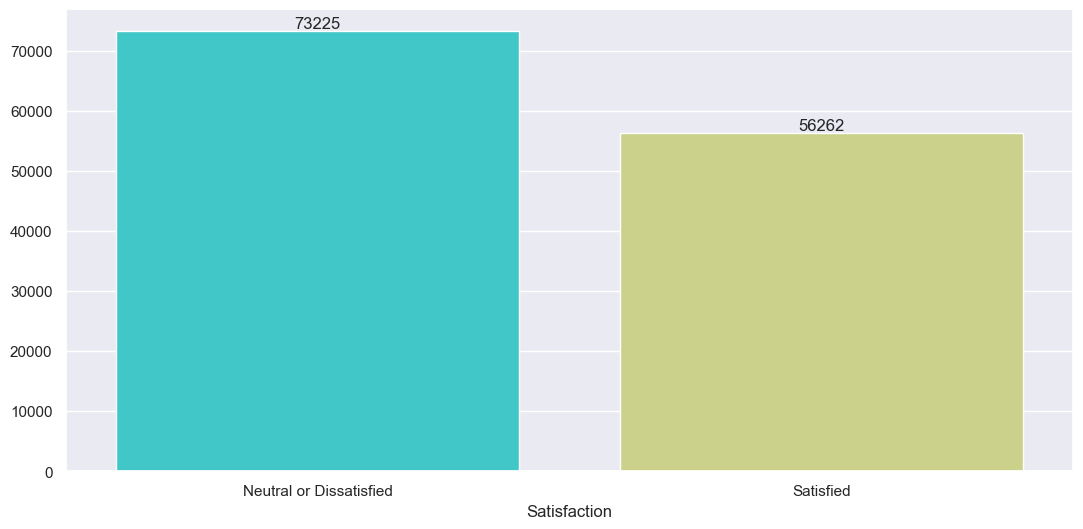

In [17]:
#plot target column
plt.figure(figsize=(13,6))
ax = sns.barplot(x=df['Satisfaction'].value_counts().index,y=df['Satisfaction'].value_counts().values,palette='rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# plt.savefig('TargetColumn.png')
plt.show()

#### Observation : 
1. Target column is categorical data
2. It is binary classification problem
3. Data is almost balanced with 57-43%
4. No need to handle unbalanced data

In [19]:
#understand categorical columns
categorical_fields = df.drop(columns=['Satisfaction'],axis=1).select_dtypes(include='O')

for col in categorical_fields.columns:
    print(col,': ',categorical_fields[col].unique())

Gender :  ['Male' 'Female']
Customer Type :  ['First-time' 'Returning']
Type of Travel :  ['Business' 'Personal']
Class :  ['Business' 'Economy' 'Economy Plus']


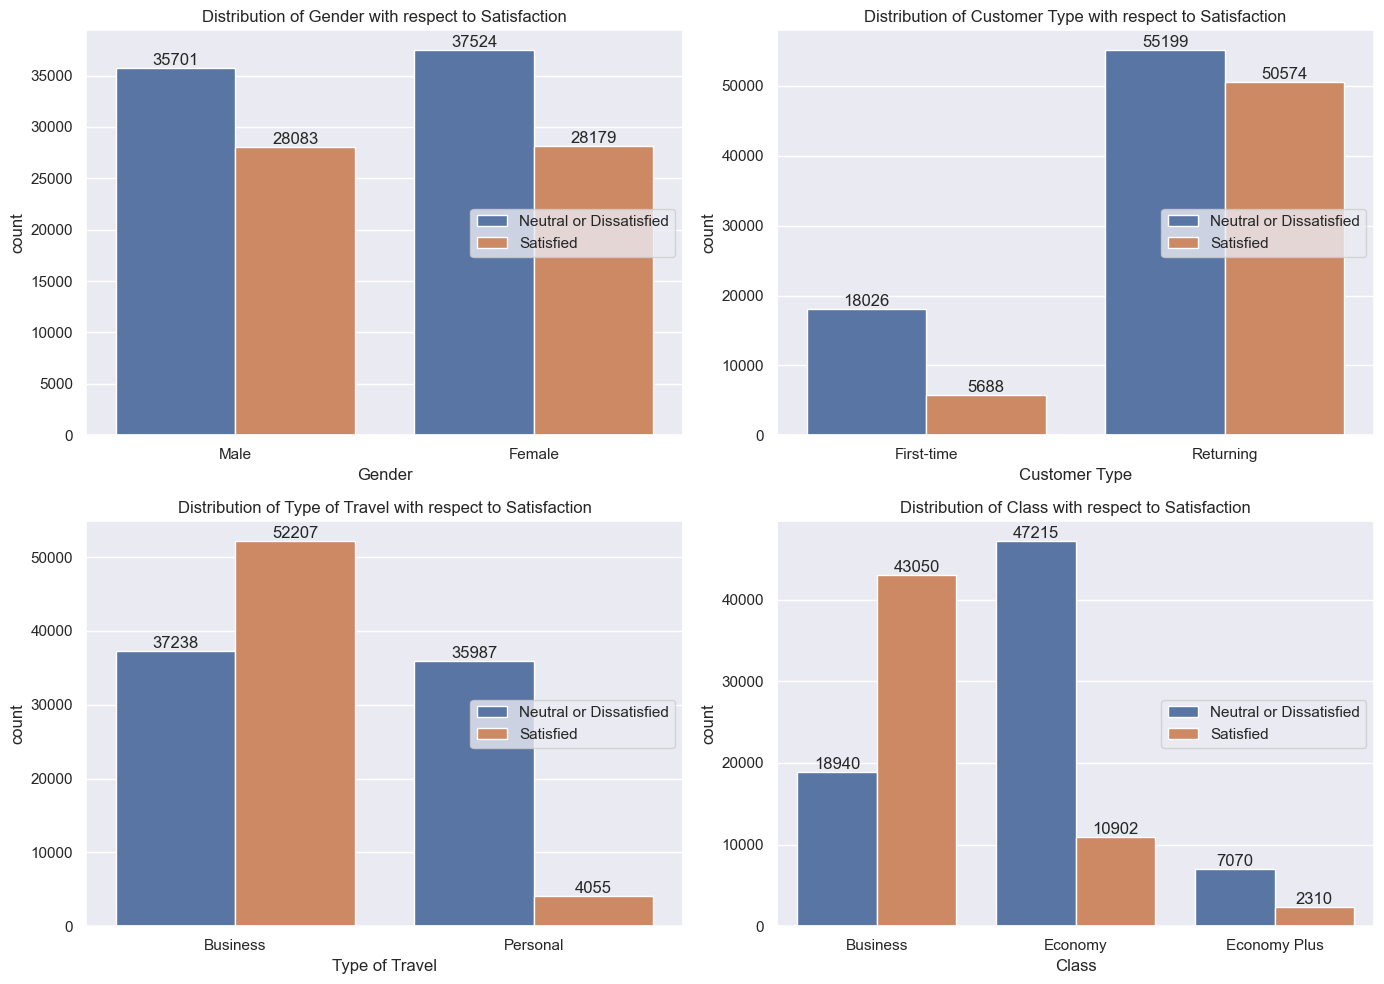

In [20]:
#plot caregorical_fields
plt.figure(figsize=(14, 10)) 
i =1
for col in categorical_fields.columns:
    plt.subplot(2, 2, i)  # Adjust to (2, 2) for 4 plots; change if you have more
    ax = sns.countplot(x=col, data=df, hue='Satisfaction')  
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Distribution of {col} with respect to Satisfaction')
    plt.xlabel(col)
    # plt.xticks(rotation=45)
    plt.legend(loc=7)
    i += 1
plt.tight_layout()
# plt.savefig('CategoricalFeatures.png')
plt.show()

### Observation:
1. Male and Female have almost same ratio choosing this airline for flying.
2. Male Passengers are more dissatisfied/neutral compare to Female Passengers.
3. Airline have more returning customers which indicates that airline is doing good at retaining customers.
4. First Timers are more dissatisfied/neutral compare to Returning Passengers.
5. Airline have less First Timers which means airline can do more advertizing to get more new customers.
6. People using this airline for more business usage (business trips) than personal travel (vacation, family trip).
7. Business type of travel passengers overall are more satiesfied.
8. Personal travelers have high dissatisfaction/neutral.
9. Customers mostly flying in Business and Economy class.
10. Very few customers choosing Economy plus.
11. Business class passengers are more satiesfied.
12. Economy/ Economy- class passenger are mostly dissatisfied/neutral.

In [22]:
#understand numnerical columns
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.0,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,37489.781165,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,1.000000,7.000000,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32494.500000,27.000000,414.0,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64972.000000,40.000000,844.0,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97415.500000,51.000000,1744.0,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.0,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


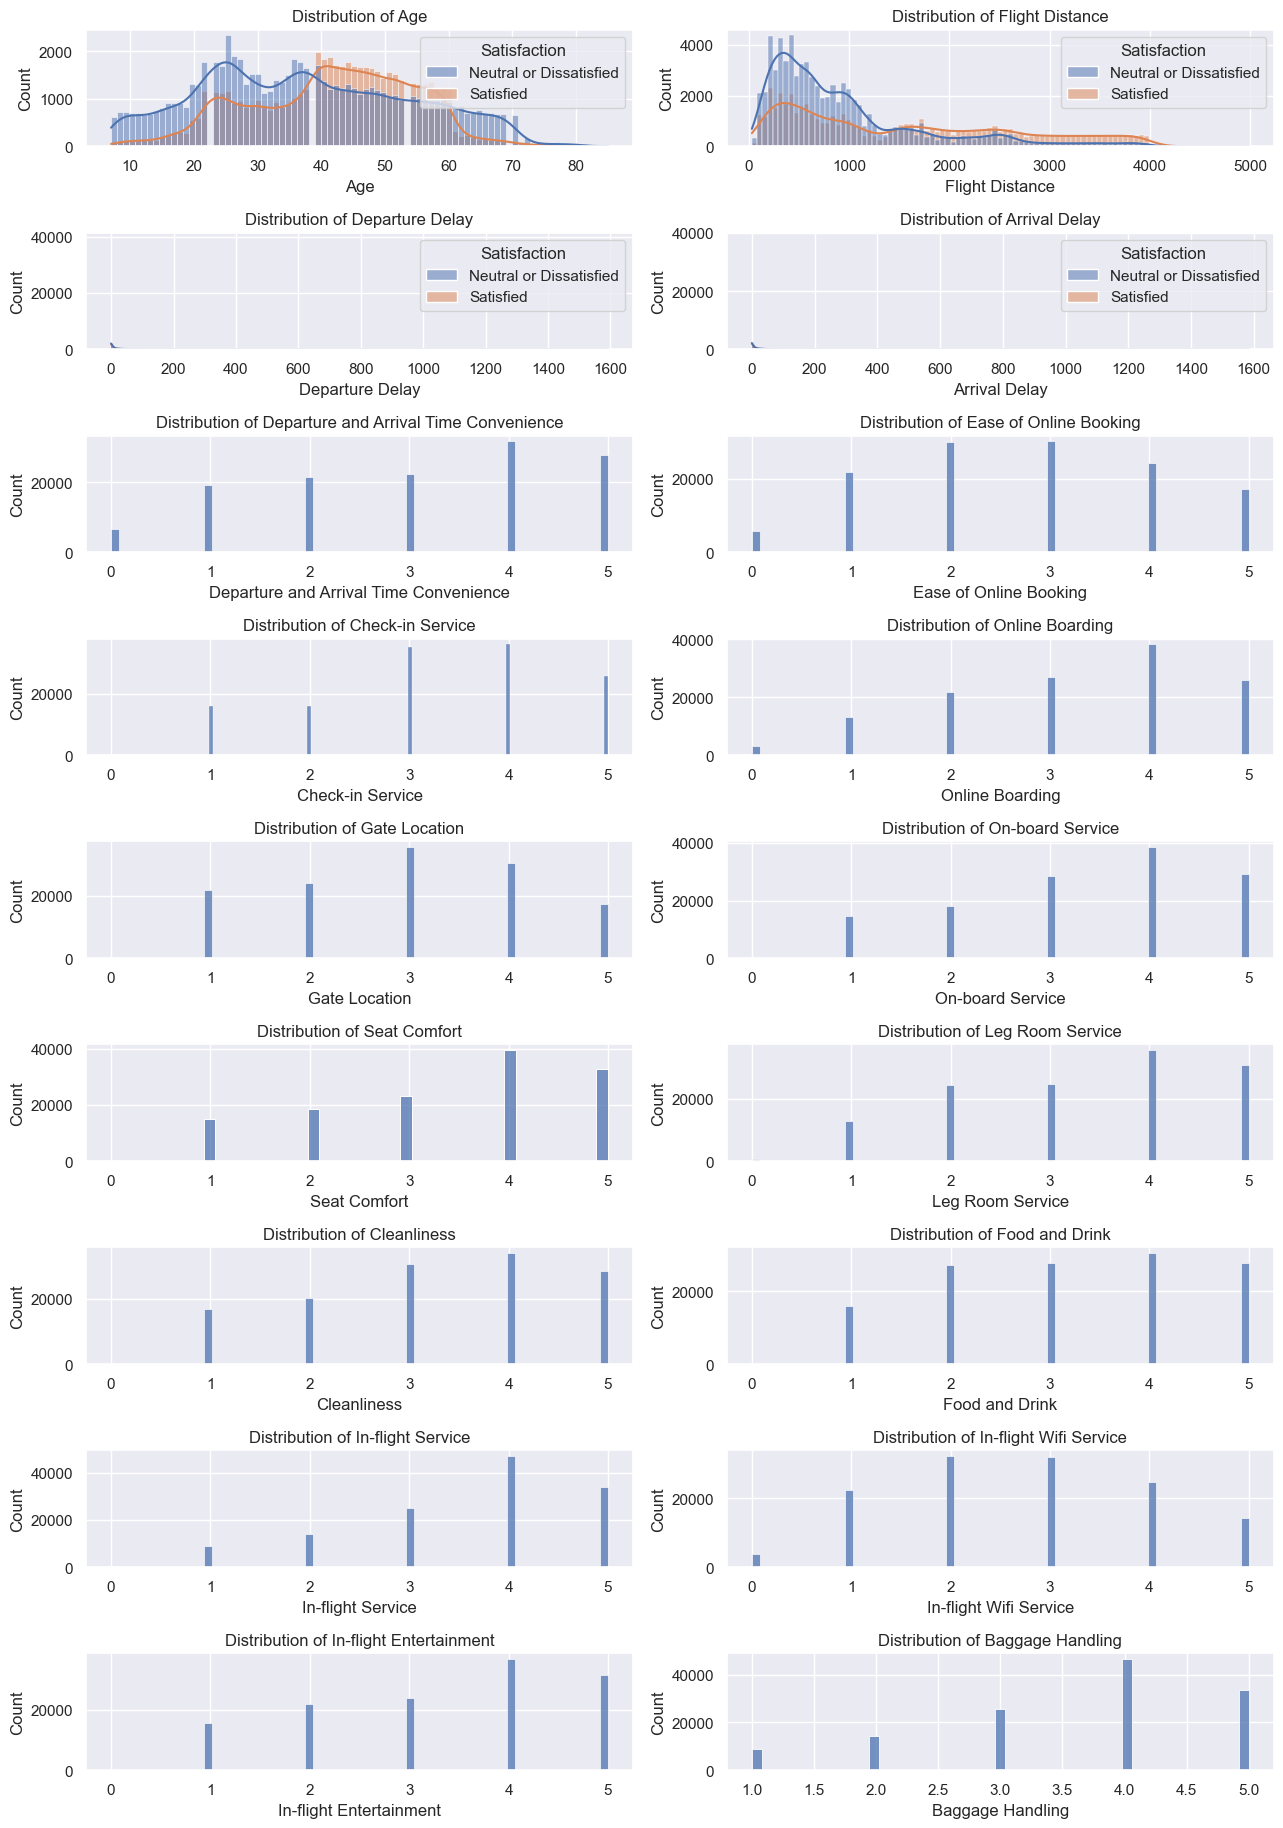

In [23]:
#understand numnerical columns
numerical_fields = df.drop(columns=['Satisfaction','ID'],axis=1).select_dtypes(exclude='O')
plt.figure(figsize=(13,20))
i=1
for col in numerical_fields.columns:
    plt.subplot(10, 2, i)
    if col in (['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']):
        sns.histplot(x=numerical_fields[col],kde=True,hue=df['Satisfaction'])
    else:
        sns.histplot(x=numerical_fields[col])
    plt.title(f'Distribution of {col}')
    i +=1

plt.tight_layout()
# plt.savefig('NumericalFeatures_small.png')    
plt.show()

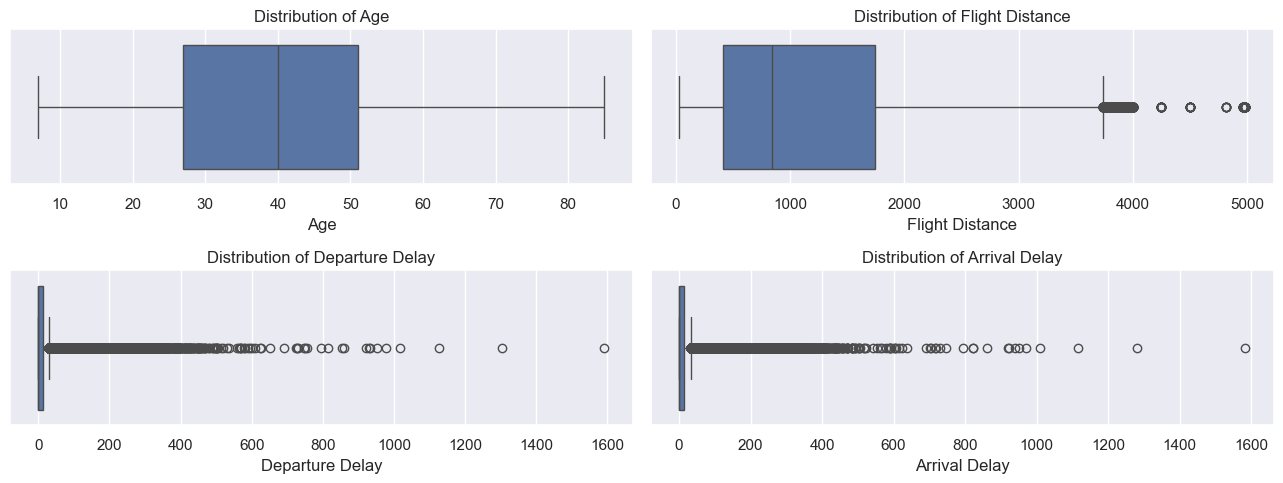

In [24]:
numerical_fields = df.drop(columns=['Satisfaction','ID'],axis=1).select_dtypes(exclude='O')
i = 1
plt.figure(figsize=(13,5))
for col in numerical_fields.columns:
    if col in (['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']):
        plt.subplot(2,2,i)
        sns.boxplot(x=numerical_fields[col])
        plt.title(f'Distribution of {col}')
        i +=1

plt.tight_layout()
# plt.savefig('Outlier.png')
plt.show()

#### Observation:
1. Most of the pasangers ages between 20-60
2. 40 or lower aged customers are more Neutral or Dissatisfied comapre to customer ages above 40 to 60
3. Senior Citizens are mostly Neutral or Dissatisfied
4. Avg flight distance is less than 1200 miles
5. In avg distance flight customers are more Dissatisfied, but for longer distance flight customer satisfaction is better.
6. Airline having very few Departure and Arrival Delay.


##### Ratings:
1. Departure and Arrival Time Convenience : 4,5,3,2
2. Ease of Online Booking                 : 3,2,4,1
3. Check-in Service                       : 4,3,5,1
4. Online Boarding                        : 4,3,5,2
5. Gate Location                          : 3,4,2,1
6. On-board Service                       : 4,5,3,2
7. Seat Comfort                           : 4,5,3,2
8. Leg Room Service                       : 4,5,3,2
9. Cleanliness                            : 4,3,5,2
10. Food and Drink                        : 4,3,5,2
11. In-flight Service                     : 4,5,3,2
12. In-flight Wifi Service                : 2,3,4,5
13. In-flight Entertainment               : 4,5,3,2
14. Baggage Handling                      : 4,5,3,2




In [26]:
#handling outliers for Flight Distance,Departure Delay, Arrival Delay
for col in ['Flight Distance','Departure Delay','Arrival Delay']:
    Q1 = numerical_fields[col].quantile(0.25)
    Q2 = numerical_fields[col].quantile(0.5)  #numerical_fields[col].mean()
    Q3 = numerical_fields[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    numerical_fields[col] = numerical_fields[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

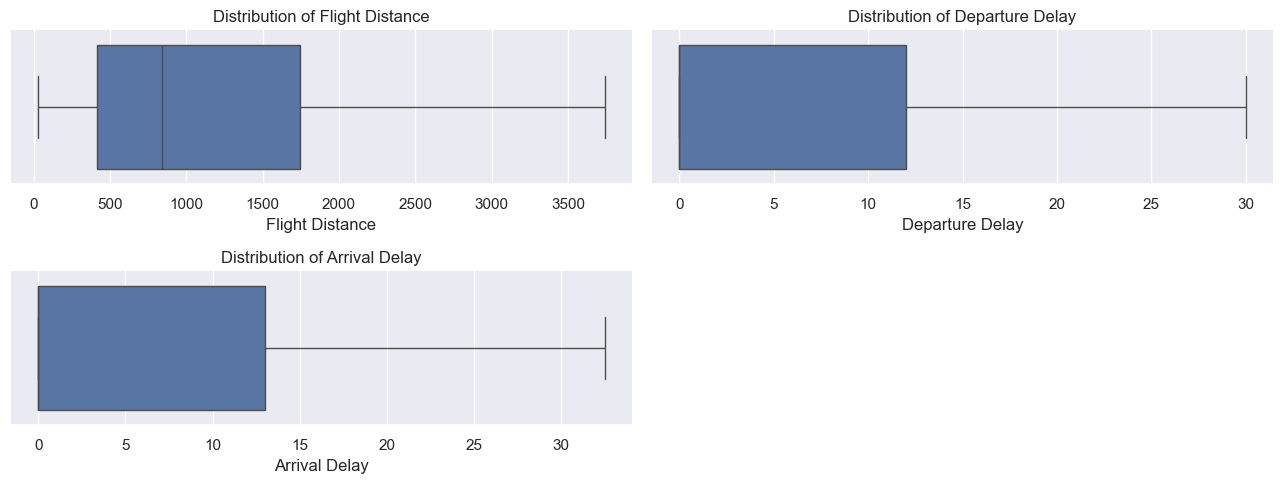

In [27]:
#boxplot after outlier treatment
i = 1
plt.figure(figsize=(13,5))
for col in numerical_fields.columns:
    if col in (['Flight Distance', 'Departure Delay', 'Arrival Delay']):
        plt.subplot(2,2,i)
        sns.boxplot(x=numerical_fields[col])
        plt.title(f'Distribution of {col}')
        i +=1

plt.tight_layout()
plt.show()

In [28]:
numerical_fields.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1186.885803,7.362608,7.933391,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,15.117597,988.492029,11.197398,11.981359,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,3739.000000,30.000000,32.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


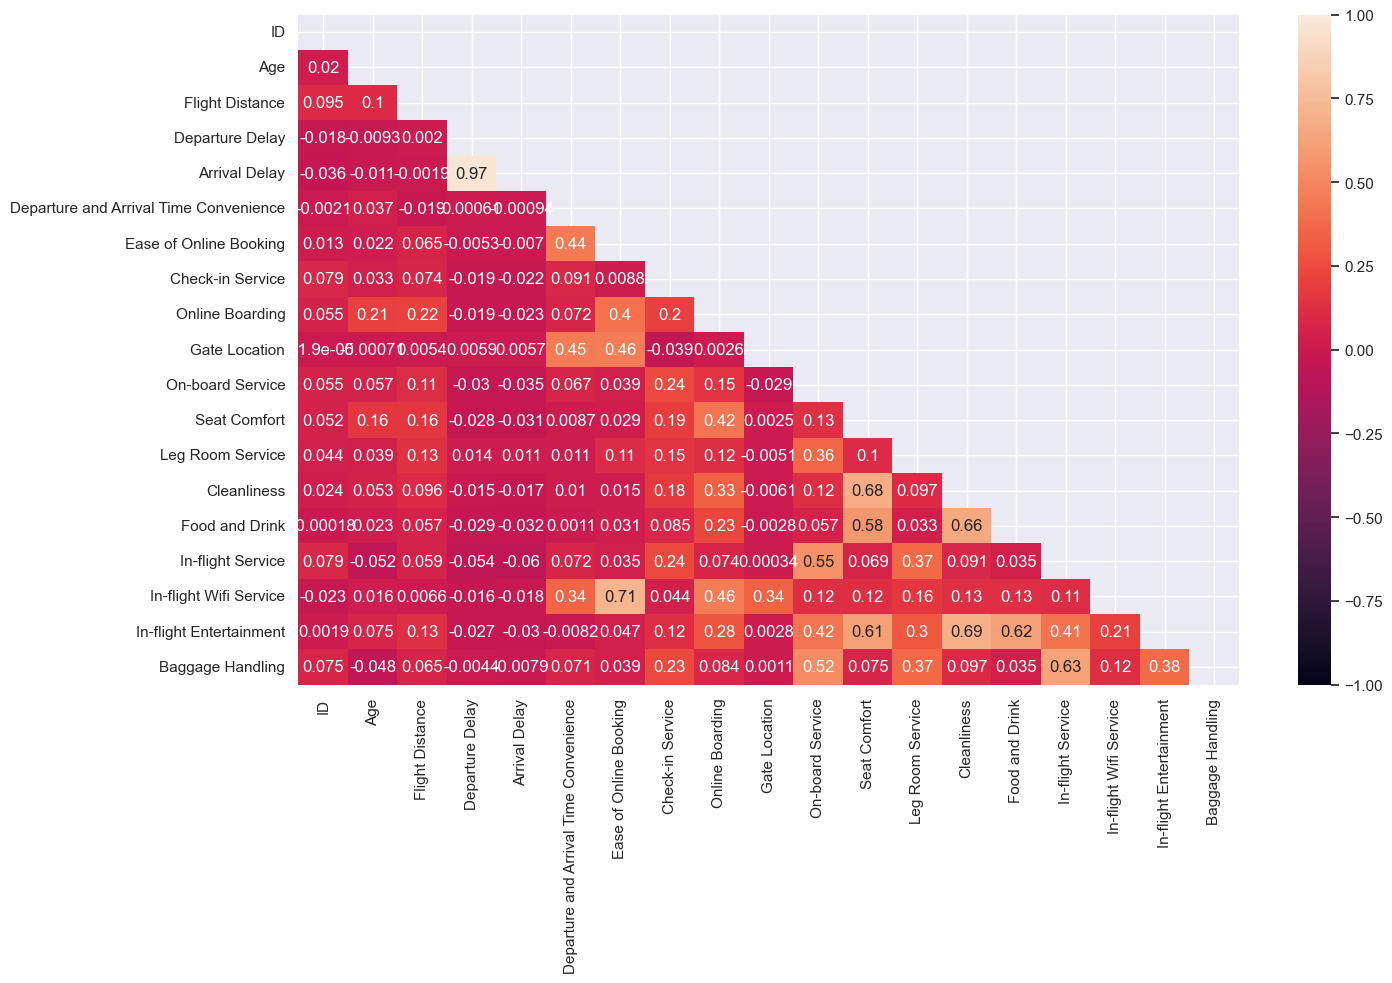

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,mask=np.triu(df.corr(numeric_only=True)))
plt.tight_layout()
plt.show()

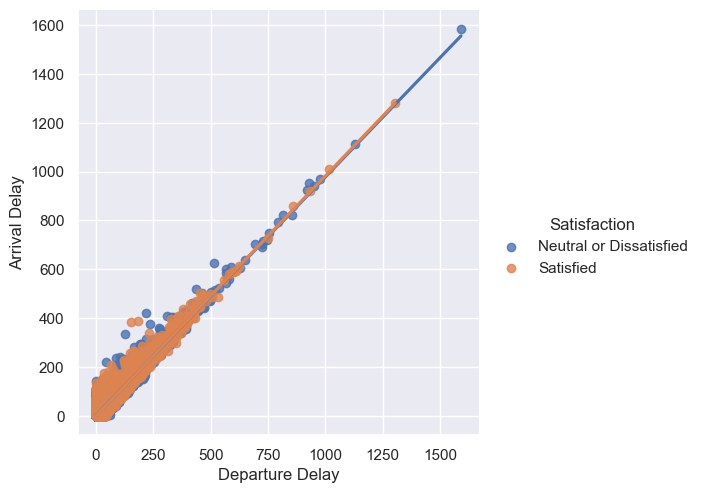

In [30]:
sns.pairplot(x_vars=['Departure Delay'],y_vars=['Arrival Delay'], data=df, kind='reg', hue='Satisfaction', height=5, aspect=1)
plt.show()

#### Observation:
we assume flight delay is major role in Dissatisfaction,but as per above graphs and analysis of 'Arrival Delay' and 'Departure Delay' we can say that, Airline is having mostly avg delay 15 min.
From above graph we can see that even if flight is delayed there are some customer giving satisfactory rating. 
From correlation graph/heatmap it is clearly notible that Departure Delay and Arrival Delay are highly correlated 0.97 which is almost 1. 

=> After all analysis we can drop 'ID' and either 'Arrival Delay' or 'Departure Delay'

## Data Preprocessing

In [33]:
#categorical features
for col in df.select_dtypes(include='O').columns:
    print('-----------------',col,'-----------------')
    print(col,': ',df[col].value_counts())

----------------- Gender -----------------
Gender :  Gender
Female    65703
Male      63784
Name: count, dtype: int64
----------------- Customer Type -----------------
Customer Type :  Customer Type
Returning     105773
First-time     23714
Name: count, dtype: int64
----------------- Type of Travel -----------------
Type of Travel :  Type of Travel
Business    89445
Personal    40042
Name: count, dtype: int64
----------------- Class -----------------
Class :  Class
Business        61990
Economy         58117
Economy Plus     9380
Name: count, dtype: int64
----------------- Satisfaction -----------------
Satisfaction :  Satisfaction
Neutral or Dissatisfied    73225
Satisfied                  56262
Name: count, dtype: int64


In [34]:
#train test split
x = df.drop(columns=['ID','Arrival Delay', 'Satisfaction'], axis=1)
y = df['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

#data dimension of train and test
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (103589, 21)
y_train:  (103589,)
x_test:  (25898, 21)
y_test:  (25898,)


* All category column except 'Class' coulumn are nominal data.
* Use maping for 'Class' field and  OHE for all other categorical field

In [36]:
#encoding of ordinal categorical features
x_train['Class'] = x_train['Class'].map({'Business':3, 'Economy Plus':2, 'Economy':1})
print(x_train['Class'].value_counts())

x_test['Class'] = x_test['Class'].map({'Business':3, 'Economy Plus':2, 'Economy':1})
print(x_test['Class'].value_counts())

Class
3    49602
1    46431
2     7556
Name: count, dtype: int64
Class
3    12388
1    11686
2     1824
Name: count, dtype: int64


In [37]:
#encoding of nominal categorical features
ohe = OneHotEncoder(dtype='int', drop='first', sparse_output=False)
encoded_cat_features_train = ohe.fit_transform(x_train.select_dtypes(include='O'))
encoded_cat_features_train = pd.DataFrame(encoded_cat_features_train, columns=ohe.get_feature_names_out())


encoded_cat_features_test = ohe.transform(x_test.select_dtypes(include='O'))
encoded_cat_features_test = pd.DataFrame(encoded_cat_features_test, columns=ohe.get_feature_names_out())

print('**************************Train**************************')
for col in encoded_cat_features_train.columns:
    print('-----------------',col,'-----------------')
    print(col,': ',encoded_cat_features_train[col].value_counts())
print('\n**************************Test**************************')
for col in encoded_cat_features_test.columns:
    print('-----------------',col,'-----------------')
    print(col,': ',encoded_cat_features_test[col].value_counts())

**************************Train**************************
----------------- Gender_Male -----------------
Gender_Male :  Gender_Male
0    52428
1    51161
Name: count, dtype: int64
----------------- Customer Type_Returning -----------------
Customer Type_Returning :  Customer Type_Returning
1    84555
0    19034
Name: count, dtype: int64
----------------- Type of Travel_Personal -----------------
Type of Travel_Personal :  Type of Travel_Personal
0    71584
1    32005
Name: count, dtype: int64

**************************Test**************************
----------------- Gender_Male -----------------
Gender_Male :  Gender_Male
0    13275
1    12623
Name: count, dtype: int64
----------------- Customer Type_Returning -----------------
Customer Type_Returning :  Customer Type_Returning
1    21218
0     4680
Name: count, dtype: int64
----------------- Type of Travel_Personal -----------------
Type of Travel_Personal :  Type of Travel_Personal
0    17861
1     8037
Name: count, dtype: int64


In [38]:
encoded_cat_features_train.rename(columns={'Gender_Male':'Male','Customer Type_Returning':'Returning','Type of Travel_Personal':'Personal','Class_Economy':'Economy','Class_Economy Plus':'Economy_Plus'}, inplace=True)
encoded_cat_features_train.head()

encoded_cat_features_test.rename(columns={'Gender_Male':'Male','Customer Type_Returning':'Returning','Type of Travel_Personal':'Personal','Class_Economy':'Economy','Class_Economy Plus':'Economy_Plus'}, inplace=True)
encoded_cat_features_test.head()

,Male,Returning,Personal
0,1,0,0
1,0,1,1
2,1,0,0
3,0,0,0
4,1,1,0


In [39]:
#encode target variable
y_train = y_train.map({'Satisfied':1,'Neutral or Dissatisfied':0})
print(y_train.head())

y_test = y_test.map({'Satisfied':1,'Neutral or Dissatisfied':0})
print(y_test.head())

47735     0
123750    1
54323     1
18083     0
108994    1
Name: Satisfaction, dtype: int64
100223    0
9189      0
8661      0
50369     0
49990     0
Name: Satisfaction, dtype: int64


In [40]:
#concat categorical field with numerical field
numerical_fields_train = x_train.select_dtypes(exclude='O').reset_index(drop=True)
encoded_cat_features_train = encoded_cat_features_train.reset_index(drop=True)
class_column_train = x_train['Class'].reset_index(drop=True)

new_x_train = pd.concat([numerical_fields_train, class_column_train, encoded_cat_features_train], axis=1)
new_x_train.head()

,Age,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class,Male,Returning,Personal
0,52,3,817,0,0,4,4,2,4,3,...,3,2,3,4,3,3,3,0,1,1
1,59,3,1971,0,4,0,3,5,2,2,...,4,3,2,0,2,2,3,1,1,0
2,42,3,2988,0,5,5,1,2,5,4,...,4,2,4,5,4,4,3,0,1,0
3,24,1,488,3,1,3,3,3,4,1,...,3,3,4,3,3,2,1,1,1,1
4,58,3,1942,46,3,3,5,5,3,5,...,3,3,5,3,5,5,3,0,1,0


In [41]:
numerical_fields_test = x_test.select_dtypes(exclude='O').reset_index(drop=True)
encoded_cat_features_test = encoded_cat_features_test.reset_index(drop=True)
class_column_test = x_test['Class'].reset_index(drop=True)

new_x_test = pd.concat([numerical_fields_test, class_column_test, encoded_cat_features_test], axis=1)
new_x_test.head()

,Age,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class,Male,Returning,Personal
0,25,1,1053,0,4,4,5,4,3,5,...,3,3,4,3,3,5,1,1,0,0
1,51,1,363,0,4,1,5,4,2,4,...,5,4,4,1,4,4,1,0,1,1
2,32,3,227,7,4,4,5,4,4,3,...,2,2,4,4,2,5,3,1,0,0
3,25,1,109,0,0,1,3,1,4,4,...,4,4,2,1,4,1,1,0,0,0
4,35,1,207,0,5,4,2,2,5,3,...,2,2,3,2,2,4,1,1,1,0


In [42]:
#standerdization
std_scale = StandardScaler()

x_train_scaled = std_scale.fit_transform(new_x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled,columns=std_scale.get_feature_names_out())

x_test_scaled = std_scale.transform(new_x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled,columns=std_scale.get_feature_names_out())

x_train_scaled_df.head()

,Age,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Class,Male,Returning,Personal
0,0.832405,1.007312,-0.373284,-0.387170,-2.001074,0.887469,0.548242,-0.925754,0.799548,-0.298005,...,-0.216575,-0.904653,-0.544120,0.957700,-0.266362,-0.533442,1.007312,-0.987843,0.474455,1.495544
1,1.295815,1.007312,0.785782,-0.387170,0.619490,-1.965015,-0.243238,1.293507,-0.765523,-1.075471,...,0.544029,-0.152893,-1.393922,-2.048784,-1.015538,-1.380009,1.007312,1.012307,0.474455,-0.668653
2,0.170391,1.007312,1.807246,-0.387170,1.274631,1.600590,-1.826197,-0.925754,1.582083,0.479460,...,0.544029,-0.904653,0.305682,1.709321,0.482814,0.313124,1.007312,-0.987843,0.474455,-0.668653
3,-1.021235,-1.070930,-0.703728,-0.307584,-1.345933,0.174348,-0.243238,-0.186001,0.799548,-1.852936,...,-0.216575,-0.152893,0.305682,0.206079,-0.266362,-1.380009,-1.070930,1.012307,0.474455,1.495544
4,1.229613,1.007312,0.756654,0.833156,-0.035651,0.174348,1.339721,1.293507,0.017012,1.256926,...,-0.216575,-0.152893,1.155485,0.206079,1.231990,1.159690,1.007312,-0.987843,0.474455,-0.668653


## Model Building

In [44]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    VotingClassifier(
        estimators=[
            ('LR', LogisticRegression()),
            ('DT', DecisionTreeClassifier()),
            ('RF', RandomForestClassifier()),
            ('SVC', SVC()),
            ('NB', GaussianNB()),
            ('KNN', KNeighborsClassifier()),
            ('ADA', AdaBoostClassifier()),
            ('GB', GradientBoostingClassifier())
        ]
    )
]

In [45]:
score={}

for model in models:
    model.fit(x_train_scaled_df,y_train)
    y_pred = model.predict(x_test_scaled_df)
    train_accuracy = model.score(x_train_scaled_df,y_train)
    test_accuracy = accuracy_score(y_test,y_pred)
    score[type(model).__name__] = {'train_accuracy': train_accuracy, 'test_accuracy':test_accuracy}

score

{'LogisticRegression': {'train_accuracy': 0.8737607274903706,
  'test_accuracy': 0.8739284886863851},
 'DecisionTreeClassifier': {'train_accuracy': 1.0,
  'test_accuracy': 0.9446289288748166},
 'RandomForestClassifier': {'train_accuracy': 0.9999903464653583,
  'test_accuracy': 0.9632790176847633},
 'SVC': {'train_accuracy': 0.9584511869020842,
  'test_accuracy': 0.9544366360336706},
 'GaussianNB': {'train_accuracy': 0.8552452480475726,
  'test_accuracy': 0.8570932118310294},
 'KNeighborsClassifier': {'train_accuracy': 0.9492417148538937,
  'test_accuracy': 0.9299173681365357},
 'AdaBoostClassifier': {'train_accuracy': 0.9276177972564654,
  'test_accuracy': 0.926944165572631},
 'GradientBoostingClassifier': {'train_accuracy': 0.9420884456843873,
  'test_accuracy': 0.9417715653718434},
 'VotingClassifier': {'train_accuracy': 0.9612024442749713,
  'test_accuracy': 0.9507297860838675}}

In [46]:
model_scores = pd.DataFrame(score).T
model_scores.reset_index(inplace=True)
model_scores.rename(columns={'index':'Models'},inplace=True)
model_scores

,Models,train_accuracy,test_accuracy
0,LogisticRegression,0.873761,0.873928
1,DecisionTreeClassifier,1.000000,0.944629
2,RandomForestClassifier,0.999990,0.963279
3,SVC,0.958451,0.954437
4,GaussianNB,0.855245,0.857093
5,KNeighborsClassifier,0.949242,0.929917
6,AdaBoostClassifier,0.927618,0.926944
7,GradientBoostingClassifier,0.942088,0.941772
8,VotingClassifier,0.961202,0.950730


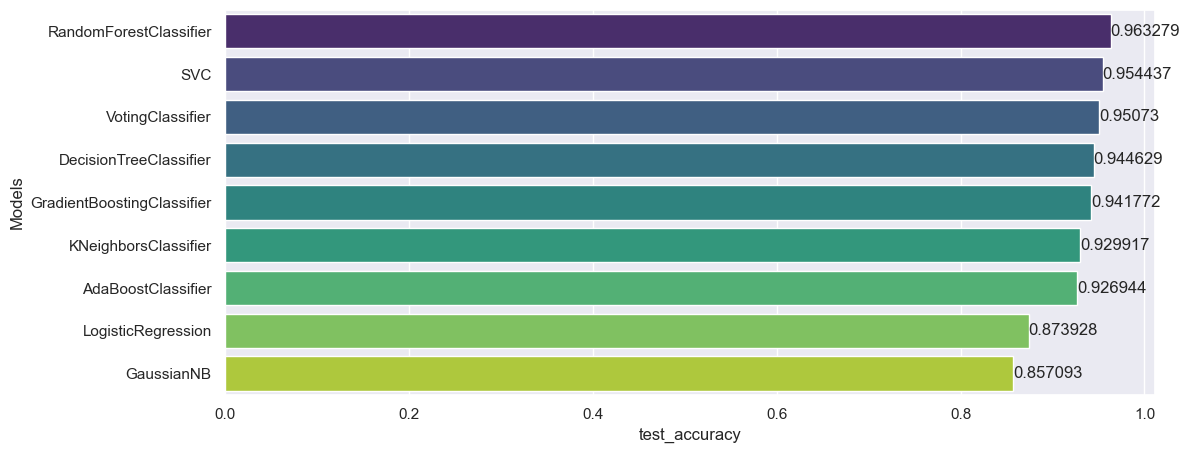

In [91]:
#plot model scores
plt.figure(figsize=(12,5))
ax = sns.barplot(y='Models',x='test_accuracy', data=model_scores.sort_values(ascending=False, by='test_accuracy'), palette='viridis')
for i in range(model_scores.shape[0]):
    plt.bar_label(ax.containers[i])
# plt.xticks(rotation=50)
# plt.savefig('model_compare.png')
plt.show()

| Model                   | Training Time                    | Computational Cost | Accuracy (General)      | Best Use Case                                           |
| ----------------------- | -------------------------------- | ------------------ | ----------------------- | ------------------------------------------------------- |
| **Logistic Regression** | 🟢 Fast                          | 🟢 Low             | 🟡 Moderate             | Simple binary classification, linear relationships      |
| **Decision Tree**       | 🟢 Fast                          | 🟢 Low             | 🟡 Moderate             | Interpretable models, small to medium datasets          |
| **Random Forest**       | 🟡 Medium                        | 🟡 Moderate        | 🟢 High                 | Tabular data, handles non-linearity, avoids overfitting |
| **SVC (SVM)**           | 🔴 Slow (on big data)            | 🔴 High            | 🟢 High (on small data) | Text classification, small clean datasets               |
| **Gaussian NB**         | 🟢 Very Fast                     | 🟢 Very Low        | 🟡 Moderate             | Naive assumptions, fast baseline model                  |
| **KNN**                 | 🟡 Medium (slow at prediction)   | 🟡 Moderate        | 🟡 Moderate             | Non-linear data, low training cost but slow inference   |
| **AdaBoost**            | 🟡 Medium                        | 🟡 Moderate        | 🟢 High (if tuned)      | When boosting weak learners helps                       |
| **Gradient Boosting**   | 🔴 Slow                          | 🔴 High            | 🟢 High                 | Tabular data with complex patterns                      |
| **Voting Classifier**   | 🔴 Slow (depends on base models) | 🔴 High            | 🟢 High                 | Combine best of multiple models for better results      |


### Observation:
* Out of all models <b>LogisticRegression</b> and <b>GaussianNB</b> giving <b>poor performance</b>.
* All other models are giving very good accuracy in training and testing.
* Out of all I am choosing <b>Random Forest</b> as it has <b>high accuracy with moderate time and cost.</b> 

In [50]:
#Hyper Parameter tunning
# rf_model = RandomForestClassifier()
# param_grid ={
#     'n_estimators' : [100,200,300],
#     'criterion' : ['gini',"entropy", "log_loss"],
#     'max_depth' : [None,10,25,50],
#     'min_samples_split' : [2,3,4,5],
#     'min_samples_leaf' : [1,2,3,4,5],
#     'max_leaf_nodes' : [None,1,2,3,4,5],
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
# grid_search.fit(x_train_scaled_df,y_train)

In [51]:
rf_model = RandomForestClassifier(random_state=42)
rf_score = cross_val_score(rf_model,x_test_scaled_df,y_test,cv=5)
print('Cross validation using 5-fold:\n',rf_score)

Cross validation using 5-fold:
 [0.9546332  0.9534749  0.95772201 0.95578297 0.95095578]


In [52]:
rf_model.fit(x_train_scaled_df,y_train)
rf_y_pred = rf_model.predict(x_test_scaled_df)
print('Train accuracy: ',rf_model.score(x_train_scaled_df,y_train))
print('Test accuracy: ',accuracy_score(y_test,rf_y_pred))

Train accuracy:  0.9999903464653583
Test accuracy:  0.9637423739284887


Classification report:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



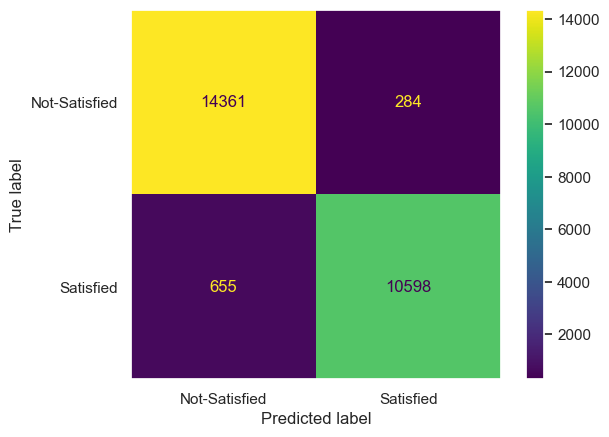

In [93]:
#classification report
print('Classification report:\n\n',classification_report(y_test,rf_y_pred))

#confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test,rf_y_pred, display_labels=['Not-Satisfied','Satisfied'])
plt.grid(False)
plt.show()

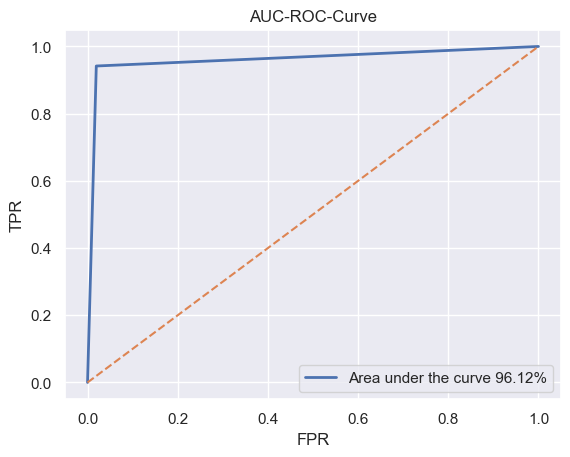

In [95]:
#auc -roc curve
fpr, tpr, thre = roc_curve(y_test, rf_y_pred)
auc = roc_auc_score(y_test, rf_y_pred)

#plot
plt.plot(fpr, tpr, lw=2, label=f"Area under the curve {round(auc*100,2)}%")
plt.plot([0,1],[0,1],ls='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC-Curve')
plt.legend()
plt.show()

## Feature importance

In [97]:
importance = rf_model.feature_importances_
feature_names = x_train_scaled_df.columns

# Displaying Feature Importance
importance_df = pd.DataFrame(zip(feature_names, importance)).rename(columns={0:'Features',1:'Importance'})
importance_df = importance_df.sort_values(by='Importance',ascending=False)
importance_df

,Features,Importance
7,Online Boarding,0.179574
15,In-flight Wifi Service,0.147429
21,Personal,0.080844
18,Class,0.068401
1,Class,0.062682
16,In-flight Entertainment,0.048449
10,Seat Comfort,0.046415
5,Ease of Online Booking,0.037916
11,Leg Room Service,0.037349
2,Flight Distance,0.036877


In [99]:
importance_df['percentage_importance'] = round(importance_df['Importance']*100, 3)
importance_df['cummulative_importance'] = importance_df['percentage_importance'].cumsum()
importance_df

,Features,Importance,percentage_importance,cummulative_importance
7,Online Boarding,0.179574,17.957,17.957
15,In-flight Wifi Service,0.147429,14.743,32.700
21,Personal,0.080844,8.084,40.784
18,Class,0.068401,6.840,47.624
1,Class,0.062682,6.268,53.892
16,In-flight Entertainment,0.048449,4.845,58.737
10,Seat Comfort,0.046415,4.642,63.379
5,Ease of Online Booking,0.037916,3.792,67.171
11,Leg Room Service,0.037349,3.735,70.906
2,Flight Distance,0.036877,3.688,74.594


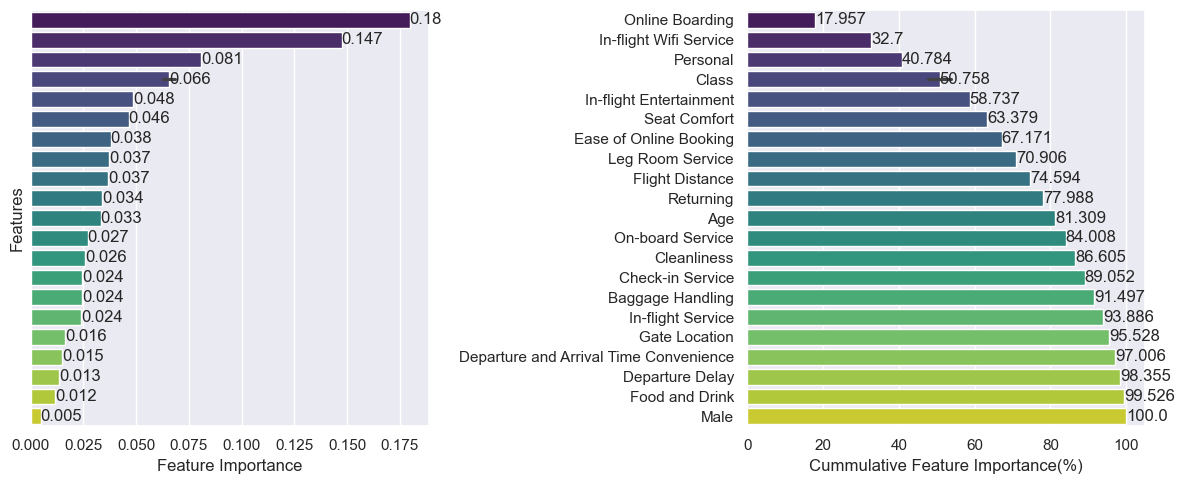

In [101]:
# Plotting Feature Importance
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
ax1=sns.barplot(x='Importance', y='Features', data=importance_df, palette='viridis')
for i in ax1.containers:
    plt.bar_label(i,fmt=lambda x: f'{round(x,3)}')
plt.yticks([])
plt.xlabel('Feature Importance')


plt.subplot(1,2,2)
ax2=sns.barplot(x='cummulative_importance', y='Features', data=importance_df, palette='viridis')
for i in ax2.containers:
    plt.bar_label(i,fmt=lambda x: f'{round(x,3)}')
plt.ylabel('')
plt.xlabel('Cummulative Feature Importance(%)')

plt.tight_layout()
plt.show()

1. Out of 21 features 14 of features have 90% importance to predict target value.
2. If we want to further enhance model performance, we can remove last 7 features..



In [340]:
#save model
import joblib

joblib.dump(rf_model,'save_model.pkl')

['save_model.pkl']